In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GOOGLE_API_KEY']=os.getenv("GOOGLE_API_KEY")
## Langsmith Tracking
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

print(llm)

d:\Data Science\02-AgenticAIworkspace\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001F449C1EFF0> default_metadata=()


In [3]:
result = llm.invoke("What is langchain?")
result

AIMessage(content="LangChain is a framework for developing applications powered by language models.  Instead of just interacting with a language model through a single prompt-response cycle, LangChain allows you to build more complex and sophisticated applications by:\n\n* **Connecting to multiple language models:**  It's not tied to a single provider like OpenAI. You can easily switch between different models (OpenAI, Hugging Face, etc.) or even chain multiple models together to leverage their individual strengths.\n\n* **Managing memory:**  LangChain enables you to maintain context across multiple interactions with a language model. This is crucial for building conversational agents or applications that need to remember previous inputs and outputs.  This is often done through mechanisms like memory, chains, and agents.\n\n* **Working with external data:**  You can connect LangChain to various external data sources (databases, APIs, documents) and use the language model to interact wi

In [4]:
print(result.content)

LangChain is a framework for developing applications powered by language models.  Instead of just interacting with a language model through a single prompt-response cycle, LangChain allows you to build more complex and sophisticated applications by:

* **Connecting to multiple language models:**  It's not tied to a single provider like OpenAI. You can easily switch between different models (OpenAI, Hugging Face, etc.) or even chain multiple models together to leverage their individual strengths.

* **Managing memory:**  LangChain enables you to maintain context across multiple interactions with a language model. This is crucial for building conversational agents or applications that need to remember previous inputs and outputs.  This is often done through mechanisms like memory, chains, and agents.

* **Working with external data:**  You can connect LangChain to various external data sources (databases, APIs, documents) and use the language model to interact with and process this data.

## Prompt Template

In [41]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")


In [42]:
chain = prompt_template|llm

response = chain.invoke({"topic": "cats"})

print(response)

content='Why are cats such bad dancers?\n\nBecause they have two left feet... and two right feet!' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-7d1d22af-fa07-4e93-9d2a-0215da789606-0' usage_metadata={'input_tokens': 6, 'output_tokens': 21, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}}


In [43]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("user", "What is {topic}?")
])
prompt_template

ChatPromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='What is {topic}?'), additional_kwargs={})])

In [39]:
chain = prompt_template|llm

response=chain.invoke({"topic":"Langchain"})

print(response)



content="LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs).  It provides a structured and modular way to build LLM-based applications, focusing on several key aspects:\n\n* **Modular Components:** LangChain breaks down LLM application development into reusable components.  These include:\n    * **Models:**  Interfaces for interacting with various LLMs (OpenAI, Hugging Face, etc.).  This abstraction allows you to easily switch between different models without rewriting significant portions of your code.\n    * **Prompts:** Tools for constructing and managing prompts effectively, including prompt templates and techniques for improving prompt engineering.\n    * **Indexes:**  Methods for structuring and querying data to be used by the LLM, allowing LLMs to access and process information from various sources (documents, databases, etc.).\n    * **Chains:**  Mechanisms for combining multiple components (models,

In [40]:
print(response.content)

LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs).  It provides a structured and modular way to build LLM-based applications, focusing on several key aspects:

* **Modular Components:** LangChain breaks down LLM application development into reusable components.  These include:
    * **Models:**  Interfaces for interacting with various LLMs (OpenAI, Hugging Face, etc.).  This abstraction allows you to easily switch between different models without rewriting significant portions of your code.
    * **Prompts:** Tools for constructing and managing prompts effectively, including prompt templates and techniques for improving prompt engineering.
    * **Indexes:**  Methods for structuring and querying data to be used by the LLM, allowing LLMs to access and process information from various sources (documents, databases, etc.).
    * **Chains:**  Mechanisms for combining multiple components (models, prompts, index

## Output parsers

In [45]:
from langchain_core.output_parsers import StrOutputParser

output_parser=StrOutputParser()

chain=prompt_template|llm|output_parser

response=chain.invoke({"topic":"Langsmith"})

print(response)

LangSmith is a platform designed to help developers improve the performance and reliability of their large language models (LLMs).  It provides tools for:

* **Experiment Tracking:**  LangSmith allows you to track and compare different LLM experiments, including the prompts used, the model responses, and various metrics. This helps in understanding what works best and identifying areas for improvement.

* **Debugging and Analysis:** The platform offers tools to debug LLM applications by visualizing the model's reasoning process, identifying problematic inputs, and analyzing the distribution of outputs. This facilitates faster identification and resolution of issues.

* **Data Versioning:**  LangSmith enables versioning of prompts and model outputs, allowing developers to revisit past experiments and understand changes over time.  This is crucial for reproducibility and iterative development.

* **Collaboration:** The platform supports collaboration among team members, allowing for shar

In [56]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

output_parser = JsonOutputParser()

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": output_parser.get_format_instructions()},
)

In [59]:
output_parser=JsonOutputParser()

chain = prompt|llm|output_parser

response=chain.invoke({"query":"Can you tell me about Langsmith?"})

In [60]:
response

{'query': 'Can you tell me about Langsmith?',
 'answer': {'description': 'Langsmith is a platform designed to help developers build, test, and improve large language model (LLM) applications. It provides tools for managing and tracking experiments, analyzing model performance, and collaborating on projects.  It aims to streamline the LLM development lifecycle, making it more efficient and reliable.',
  'key_features': ['**Experiment Management:**  Track and organize different versions of your prompts, models, and parameters.',
   '**Testing and Evaluation:**  Run automated tests to assess LLM performance and identify potential issues.',
   '**Data Versioning:** Manage and track changes to your datasets used for training and evaluation.',
   '**Collaboration Tools:** Facilitate teamwork on LLM projects through shared access and version control.',
   '**Metrics and Visualization:**  Provides dashboards to visualize model performance and identify areas for improvement.',
   '**Integration

## RAG

### WebBaseLoader

In [5]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://python.langchain.com/docs/introduction/")

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [6]:
document = loader.load()
document

[Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='\n\n\n\n\nIntroduction | 🦜️🔗 LangChain\n\n\n\n\n\n\nSkip to main contentJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow

### Text Splitters

In [7]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(document)
documents


[Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='Introduction | 🦜️🔗 LangChain'),
 Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='Skip to main contentJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval 

### Embeddings

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [10]:
embeddings

GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001F44A008800>, model='models/embedding-001', task_type=None, google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None)

### Vector Store

In [11]:
from langchain_community.vectorstores import FAISS

vectorstoredb = FAISS.from_documents(documents, embeddings)

In [12]:
vectorstoredb

### Query - Similarity Search

In [13]:
query = "What is Langchain?"
result = vectorstoredb.similarity_search(query)
print(result[0].page_content)

storesWhy LangChain?Ecosystem🦜🛠️ LangSmith🦜🕸️ LangGraphVersionsv0.3v0.2Pydantic compatibilityMigrating from v0.0 chainsHow to migrate from v0.0 chainsMigrating from ConstitutionalChainMigrating from ConversationalChainMigrating from ConversationalRetrievalChainMigrating from LLMChainMigrating from LLMMathChainMigrating from LLMRouterChainMigrating from MapReduceDocumentsChainMigrating from MapRerankDocumentsChainMigrating from MultiPromptChainMigrating from RefineDocumentsChainMigrating from RetrievalQAMigrating from StuffDocumentsChainUpgrading to LangGraph memoryHow to migrate to LangGraph memoryHow to use BaseChatMessageHistory with LangGraphMigrating off ConversationBufferMemory or ConversationStringBufferMemoryMigrating off ConversationBufferWindowMemory or ConversationTokenBufferMemoryMigrating off ConversationSummaryMemory or ConversationSummaryBufferMemoryA Long-Term Memory AgentRelease policySecurity PolicyIntroductionOn this pageIntroduction


In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt=ChatPromptTemplate.from_template(
                                        """
                                        Answer the following question based only on the provided context:
                                        <context>
                                        {context}
                                        </context>
                                        """
                                        )
prompt


### Create_stuff_documents_chain

Create a chain for passing a list of Documents to a model.

Link: https://api.python.langchain.com/en/latest/chains/langchain.chains.combine_documents.stuff.create_stuff_documents_chain.html#langchain.chains.combine_documents.stuff.create_stuff_documents_chain

In [ ]:
# pip install -U langchain langchain-community

from langchain_community.chat_models import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.documents import Document
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt = ChatPromptTemplate.from_messages(
    [("system", "What are everyone's favorite colors:\n\n{context}")]
)
# llm = ChatOpenAI(model="gpt-3.5-turbo")
# chain = create_stuff_documents_chain(llm, prompt)
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

chain = create_stuff_documents_chain(llm, prompt)

In [16]:
chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="What are everyone's favorite colors:\n\n{context}"), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001F47F170EC0>, default_metadata=())
| StrOutputParser(), kwargs={}, config={'run_name': 'stuff_documents_chain'}, config_factories=[])

In [ ]:
# Knowledge base for LLM
docs = [
    Document(page_content="Jesse loves red but not yellow"),
    Document(page_content = "Jamal loves green but not as much as he loves orange")
]

chain.invoke({"context": docs})

## **My RAG - Follow this**

### Concept

Link: https://python.langchain.com/v0.2/docs/tutorials/rag/#what-is-rag

**Indexing**

1. **Load:** First we need to load our data. This is done with Document Loaders.
2. **Split:** Text splitters break large Documents into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won't fit in a model's finite context window.
3. **Store:** We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

**Retrieval and generation**

4. **Retrieve:** Given a user input, relevant splits are retrieved from storage using a Retriever.
5. **Generate:** A ChatModel / LLM produces an answer using a prompt that includes the question and the retrieved data

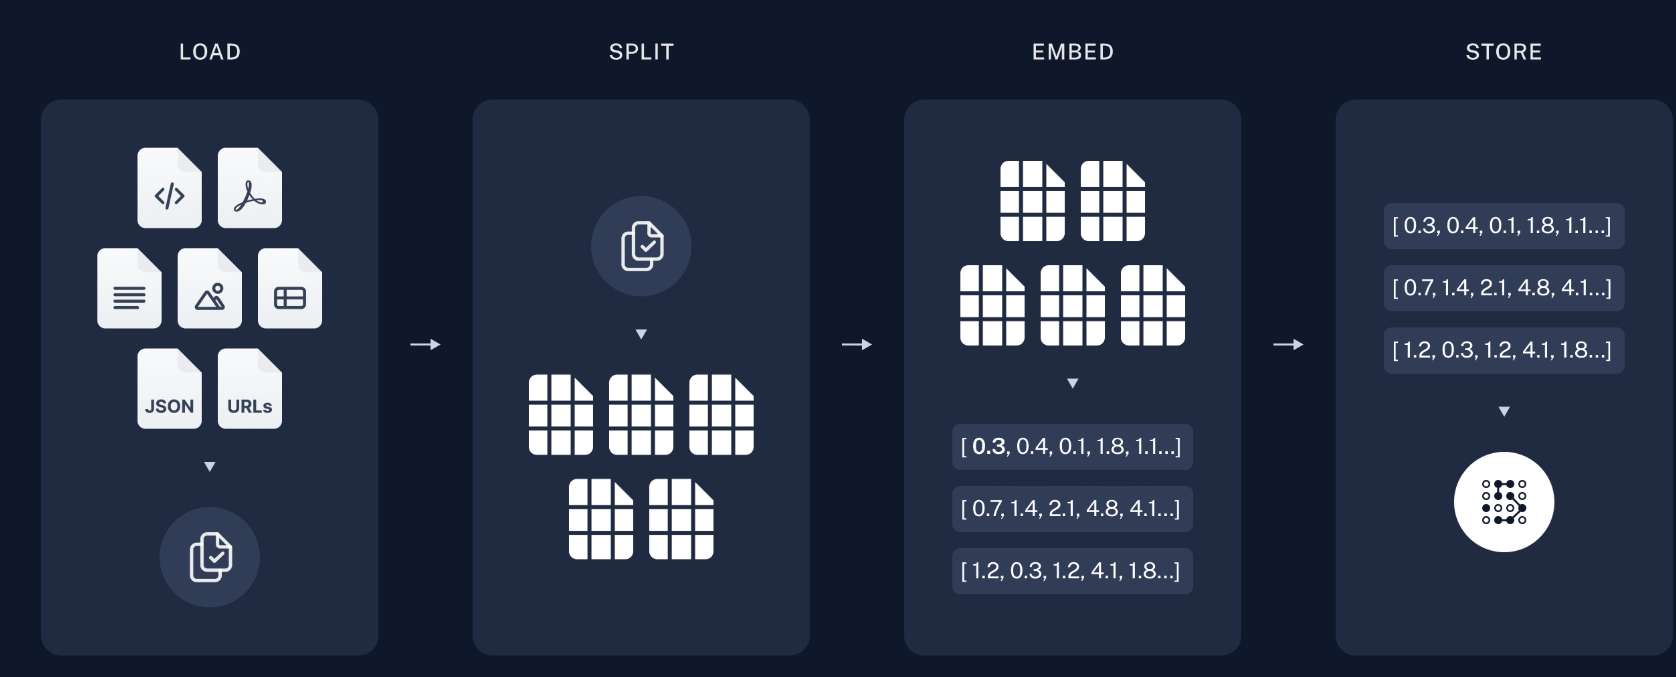

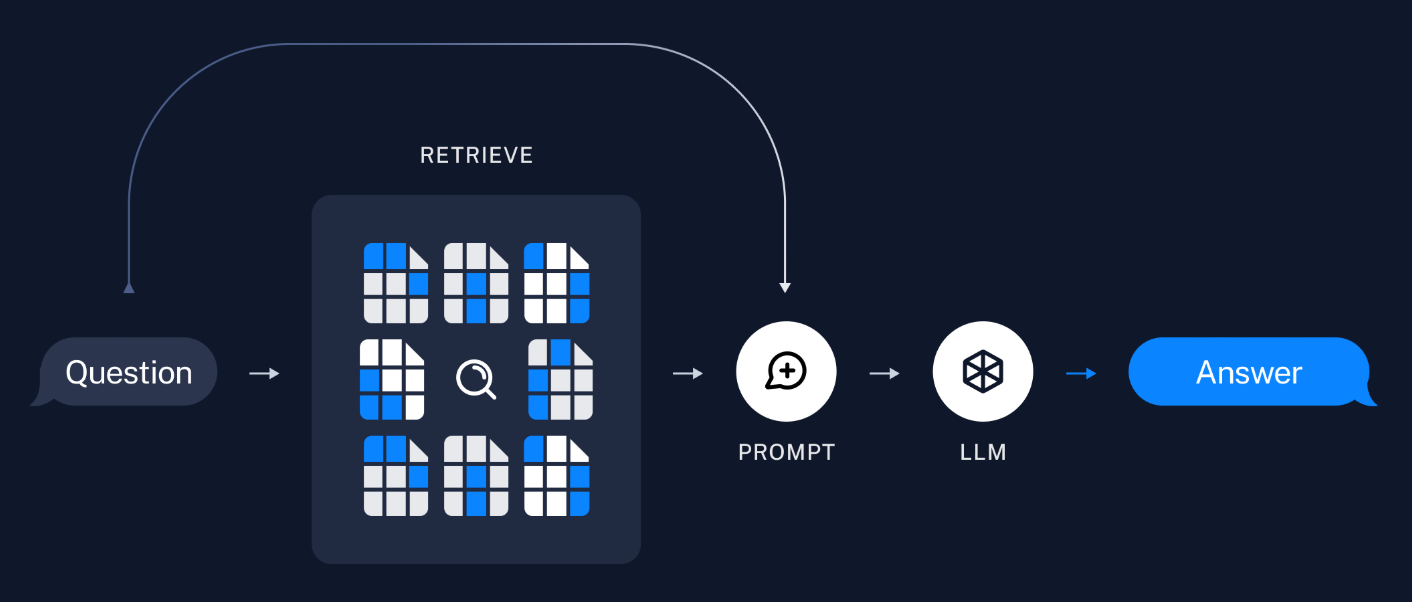

### Code

Link: https://python.langchain.com/v0.2/docs/tutorials/qa_chat_history/#chains

In [ ]:
import bs4
from langchain import hub
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 1. Load, chunk and index the contents of the blog to create a retriever.
## loader = WebBaseLoader("https://python.langchain.com/docs/introduction/")
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
## from langchain_chroma import Chroma
## from langchain_openai import OpenAIEmbeddings
## vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())
vectorstore = FAISS.from_documents(splits, embeddings)
retriever = vectorstore.as_retriever()


# 2. Incorporate the retriever into a question-answering chain.
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

## Create a chain for passing a list of Documents to a model.
question_answer_chain = create_stuff_documents_chain(llm, prompt)
## Create retrieval chain that retrieves documents and then passes them on.
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [25]:
# Just for Knowledge
question_answer_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, say that you don't know. Use three sentences maximum and keep the answer concise.\n\n{context}"), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.gen

In [22]:
# Just for Knowledge
rag_chain

RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableLambda(lambda x: x['input'])
           | VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001F4203279B0>, search_kwargs={}), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you

In [23]:
response = rag_chain.invoke({"input": "What is Task Decomposition?"})
response["answer"]

'Task decomposition breaks down complex tasks into smaller, simpler subtasks.  This is often done using techniques like Chain of Thought (CoT) or Tree of Thoughts, which guide a language model to think step-by-step or explore multiple reasoning paths.  The goal is to make complex problems more manageable for AI systems.'